In [ ]:
# Install prerequisites

# pip install kaggle

In [ ]:
# Import required packages

import json
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Connect to Kaggle

if "kaggle.json" in os.listdir():
  with open("kaggle.json") as f:
    line = f.readline()
    kaggle_auth = json.loads(line)
else:
  kaggle_auth = {
      "username": "tylerpotts",
      "key": "153fcab7c5aa2b3082e66046bf148821"
  }
os.environ["KAGGLE_USERNAME"] = kaggle_auth["username"]
os.environ["KAGGLE_KEY"] = kaggle_auth["key"]

kaggle_auth

{'username': 'tylerpotts', 'key': '153fcab7c5aa2b3082e66046bf148821'}

In [ ]:
# Get Kaggle datasets

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
dataset_names = [
    "osmi/mental-health-in-tech-2016",
    "osmihelp/osmi-mental-health-in-tech-survey-2017",
    "osmihelp/osmi-mental-health-in-tech-survey-2018",
    "osmihelp/osmi-mental-health-in-tech-survey-2019",
]
for dataset_name in dataset_names:
  api.dataset_download_files(dataset_name, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016
Dataset URL: https://www.kaggle.com/datasets/osmihelp/osmi-mental-health-in-tech-survey-2017
Dataset URL: https://www.kaggle.com/datasets/osmihelp/osmi-mental-health-in-tech-survey-2018
Dataset URL: https://www.kaggle.com/datasets/osmihelp/osmi-mental-health-in-tech-survey-2019


In [ ]:
# Upload CSV, mark the year, merge

csv_names = [file for file in os.listdir() if ".csv" in file and file != "data.csv"]
dfs = []
for csv_name in csv_names:
  filepath = os.path.join(os.getcwd(), csv_name)
  df = pd.read_csv(filepath)

  # Clean dataframe

  if "2016" in csv_name:
    year = 2016
  elif "2017" in csv_name:
    year = 2017
  elif "2018" in csv_name:
    year = 2018
  elif "2019" in csv_name:
    year = 2019
  df["Year"] = [year] * len(df)

  column_name1 = "How many employees does your company or organization have?"

  column_name2 = "What is your age?"
  for i in range(len(df[column_name2].values)):
    value = df[column_name2].values[i]
    try:
      value = int(float(value))
    except:
      value = 0
    if value > 130: # People aren't older than 130
      value = 0
    elif value < 0: # People aren't younger than 0
      value = 0
    df[column_name2].iloc[i] = value

  column_name3 = "What is your gender?"
  for i in range(len(df[column_name3].values)):
    value = df[column_name3].values[i]
    value = str(value).lower().strip()
    if value == "m":
      value = "male"
    elif value == "f":
      value = "female"
    elif value == "dude":
      value = "male"
    elif "female" in value:
      value = "female"
    elif "femail" in value:
      value = "female"
    elif "male" in value:
      value = "male"
    elif "mail" in value:
      value = "male"
    elif "woman" in value:
      value = "female"
    elif "man" in value:
      value = "male"
    elif "boy" in value:
      value = "male"
    elif "girl" in value:
      value = "female"
    else:
      value = "other"
    df[column_name3].iloc[i] = value

  column_name4 = "Do you currently have a mental health disorder?"
  column_name4b = "Do you *currently* have a mental health disorder?"
  if column_name4b in df.columns:
    df = df.rename(columns={column_name4b: column_name4})
  for i in range(len(df[column_name4].values)):
    value = df[column_name4].values[i]
    value = str(value).lower().strip()
    if value in ["maybe", "possibly", "don't know"]:
      value = "not sure"
    df[column_name4].iloc[i] = value

  column_names = [column_name1, column_name2, column_name3, column_name4, "Year"]
  data = df.to_dict("records")
  df = pd.DataFrame(data=data, columns=column_names)

  dfs.append(df)

# Merge

df = pd.concat(dfs, ignore_index=True)

# Save as CSV

df.to_csv("data.csv")

# Display

df

,How many employees does your company or organization have?,What is your age?,What is your gender?,Do you currently have a mental health disorder?,Year
0,26-100,25.0,male,not sure,2019
1,26-100,51.0,male,not sure,2019
2,26-100,27.0,male,no,2019
3,100-500,37.0,male,no,2019
4,26-100,46.0,male,no,2019
...,...,...,...,...,...
2953,6-25,28.0,male,no,2018
2954,100-500,39.0,male,yes,2018
2955,100-500,31.0,male,yes,2018
2956,6-25,27.0,male,not sure,2018


In [ ]:
df["Year"].value_counts()

Year
2016    1433
2017     756
2018     417
2019     352
Name: count, dtype: int64

In [ ]:
df["Do you currently have a mental health disorder?"].value_counts()

Do you currently have a mental health disorder?
yes         1237
no           969
not sure     752
Name: count, dtype: int64

Charts

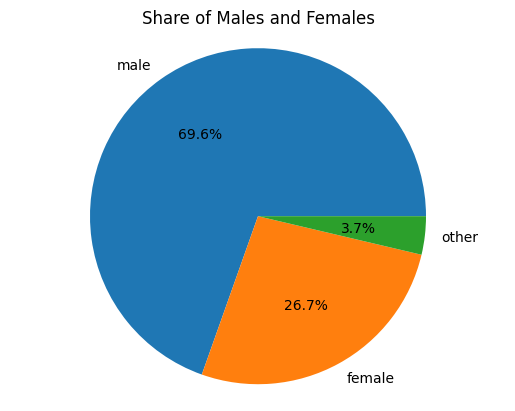

In [ ]:
# Overall male vs. female

import matplotlib.pyplot as plt
gender_counts = df["What is your gender?"].value_counts()
labels = gender_counts.index
values = gender_counts.values
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Share of Males and Females")
plt.show()

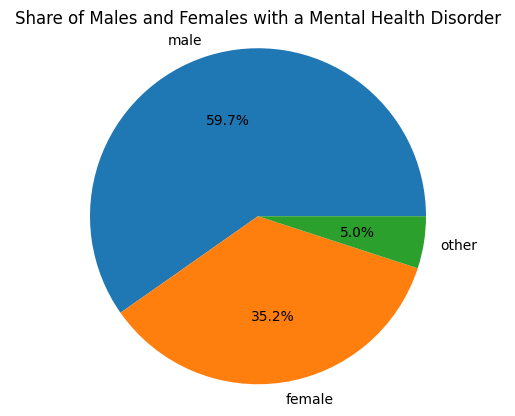

In [ ]:
# Male vs. female for mental health disorder

import matplotlib.pyplot as plt
filtered_df = df[df["Do you currently have a mental health disorder?"] == "yes"]
gender_counts = filtered_df["What is your gender?"].value_counts()
labels = gender_counts.index
values = gender_counts.values
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Share of Males and Females with a Mental Health Disorder")
plt.show()

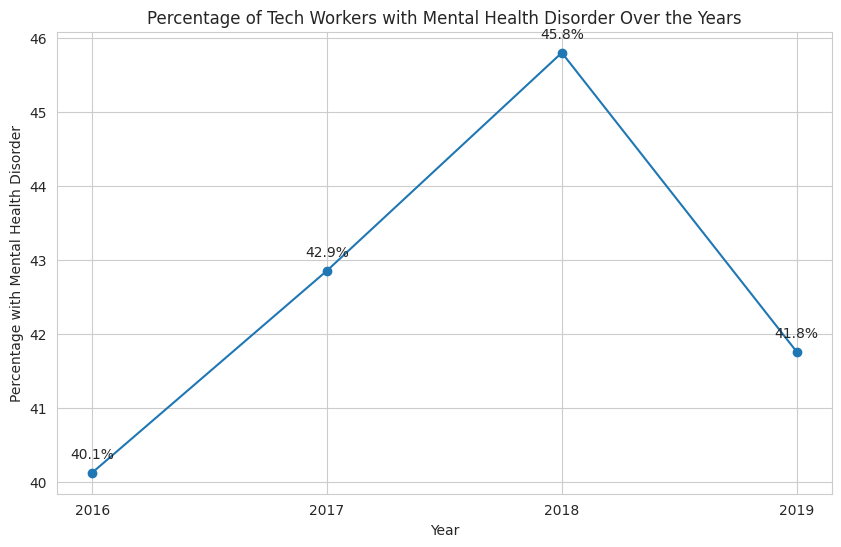

In [ ]:
import matplotlib.pyplot as plt
years = sorted(df["Year"].unique())
percentages = []
for year in years:
    year_data = df[df["Year"] == year]
    total_count = len(year_data)
    disorder_count = len(year_data[year_data["Do you currently have a mental health disorder?"] == "yes"])
    percentage = (disorder_count / total_count) * 100
    percentages.append(percentage)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(years, percentages, marker="o")
plt.xlabel("Year")
plt.xticks(years)
plt.ylabel("Percentage with Mental Health Disorder")
plt.title("Percentage of Tech Workers with Mental Health Disorder Over the Years")
# Add data labels
for x, y in zip(years, percentages):
    label = f"{y:.1f}%"  # Format the label with 1 decimal place
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()

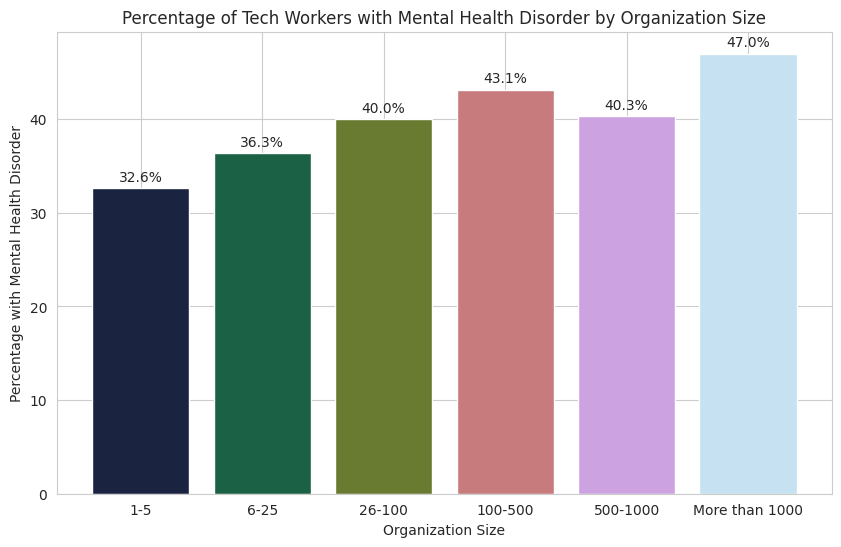

In [ ]:
import matplotlib.pyplot as plt

org_sizes = df["How many employees does your company or organization have?"].unique()
org_sizes = [item for item in org_sizes if isinstance(item, str)]
def convert_size(size):
    if size == 'More than 1000':
        return (float('inf'), size)
    else:
        lower, upper = map(int, size.split('-'))
        return (lower, upper, size)
org_sizes = sorted(org_sizes, key=convert_size)

# Calculate the percentage for each organization size
percentages = []
for size in org_sizes:
    size_data = df[df["How many employees does your company or organization have?"] == size]
    total_count = len(size_data)
    disorder_count = len(size_data[size_data["Do you currently have a mental health disorder?"] == "yes"])
    try:
      percentage = (disorder_count / total_count) * 100
    except ZeroDivisionError:
      percentage = 0
    percentages.append(percentage)

# Create the bar chart
plt.figure(figsize=(10, 6))
bar_colors = sns.color_palette("cubehelix", n_colors=len(org_sizes))
bars = plt.bar(org_sizes, percentages, color=bar_colors)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f"{height:.1f}%",
        xy = (bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center',
        va='bottom'
    )

plt.xlabel("Organization Size")
plt.ylabel("Percentage with Mental Health Disorder")
plt.title("Percentage of Tech Workers with Mental Health Disorder by Organization Size")

sns.set_style("whitegrid")
plt.show()